# <span style="color:darkblue"> Kaggle #1 </span>

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

#### Functions for feature visualisation

In [2]:
def num_compare(df, feature, forCol, binwidth, ax=None, xlim=None, ylim=None):
    copied = df.copy()
    copied[feature].fillna(value=copied[feature].mean(), inplace=True)
    copied[feature] = copied[feature].astype('float64')
    sns.histplot(ax=ax, data=copied, x=feature, hue=forCol, binwidth=binwidth, shrink=.8)
    if xlim is not None:
        plt.xlim(xlim)
    if ylim is not None:
        plt.ylim(ylim)

In [3]:
def cat_compare(df, feature, forCol, ylim=None, ax=None):
    copied = df.copy()
    copied[feature] = copied[feature].astype('string')
    values = copied[feature].value_counts().index
    counts = copied[feature].value_counts().values
    sns.histplot(data=copied, x=feature, hue=forCol, binwidth=2, multiple='fill', shrink=.9, palette="YlOrBr", ax=ax)
    
    if ylim:
        plt.ylim(ylim)

In [4]:
data = pd.read_csv('train.csv')

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [66]:
data

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,...,Transported,Deck,CabNum,Side,TotalSpent,Group,NinGroup,VIPinGroup,Surname,Route
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,...,False,B,0,P,0.0,0001,01,False,Ofracculy,Eu-TR
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,...,True,F,0,S,736.0,0002,01,False,Vines,Ea-TR
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,...,False,A,0,S,10383.0,0003,01,True,Susent,Eu-TR
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,...,False,A,0,S,5176.0,0003,02,True,Susent,Eu-TR
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,...,True,F,1,S,1091.0,0004,01,False,Santantines,Ea-TR
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,...,False,A,98,P,8536.0,9276,01,True,Noxnuther,Eu-55
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,...,False,G,1499,S,0.0,9278,01,False,Mondalley,Ea-PS
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,...,True,G,1500,S,1873.0,9279,01,False,Connon,Ea-TR
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,...,False,E,608,S,4637.0,9280,01,False,Hontichre,Eu-55


In [6]:
missing = data.isnull()
for col in data.columns:
    print(f'{col}:\n\t{8693 - missing[col].value_counts()[0]} missing values')
    print('-----------------')

PassengerId:
	0 missing values
-----------------
HomePlanet:
	201 missing values
-----------------
CryoSleep:
	217 missing values
-----------------
Cabin:
	199 missing values
-----------------
Destination:
	182 missing values
-----------------
Age:
	179 missing values
-----------------
VIP:
	203 missing values
-----------------
RoomService:
	181 missing values
-----------------
FoodCourt:
	183 missing values
-----------------
ShoppingMall:
	208 missing values
-----------------
Spa:
	183 missing values
-----------------
VRDeck:
	188 missing values
-----------------
Name:
	200 missing values
-----------------
Transported:
	0 missing values
-----------------


#### Splitting Cabin feature

In [7]:
data[['Deck', 'CabNum', 'Side']] = data.Cabin.str.split('/', expand=True)[[0, 1, 2]]

#### Creating TotalSpent feature

In [8]:
data['TotalSpent'] = data.RoomService + data.FoodCourt + data.ShoppingMall + data.Spa + data.VRDeck 

In [9]:
target = 'Transported'
cat_cols = ['HomePlanet', 'CryoSleep', 'Destination', 'VIP', 'Deck', 'Side']
num_cols = ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'TotalSpent']

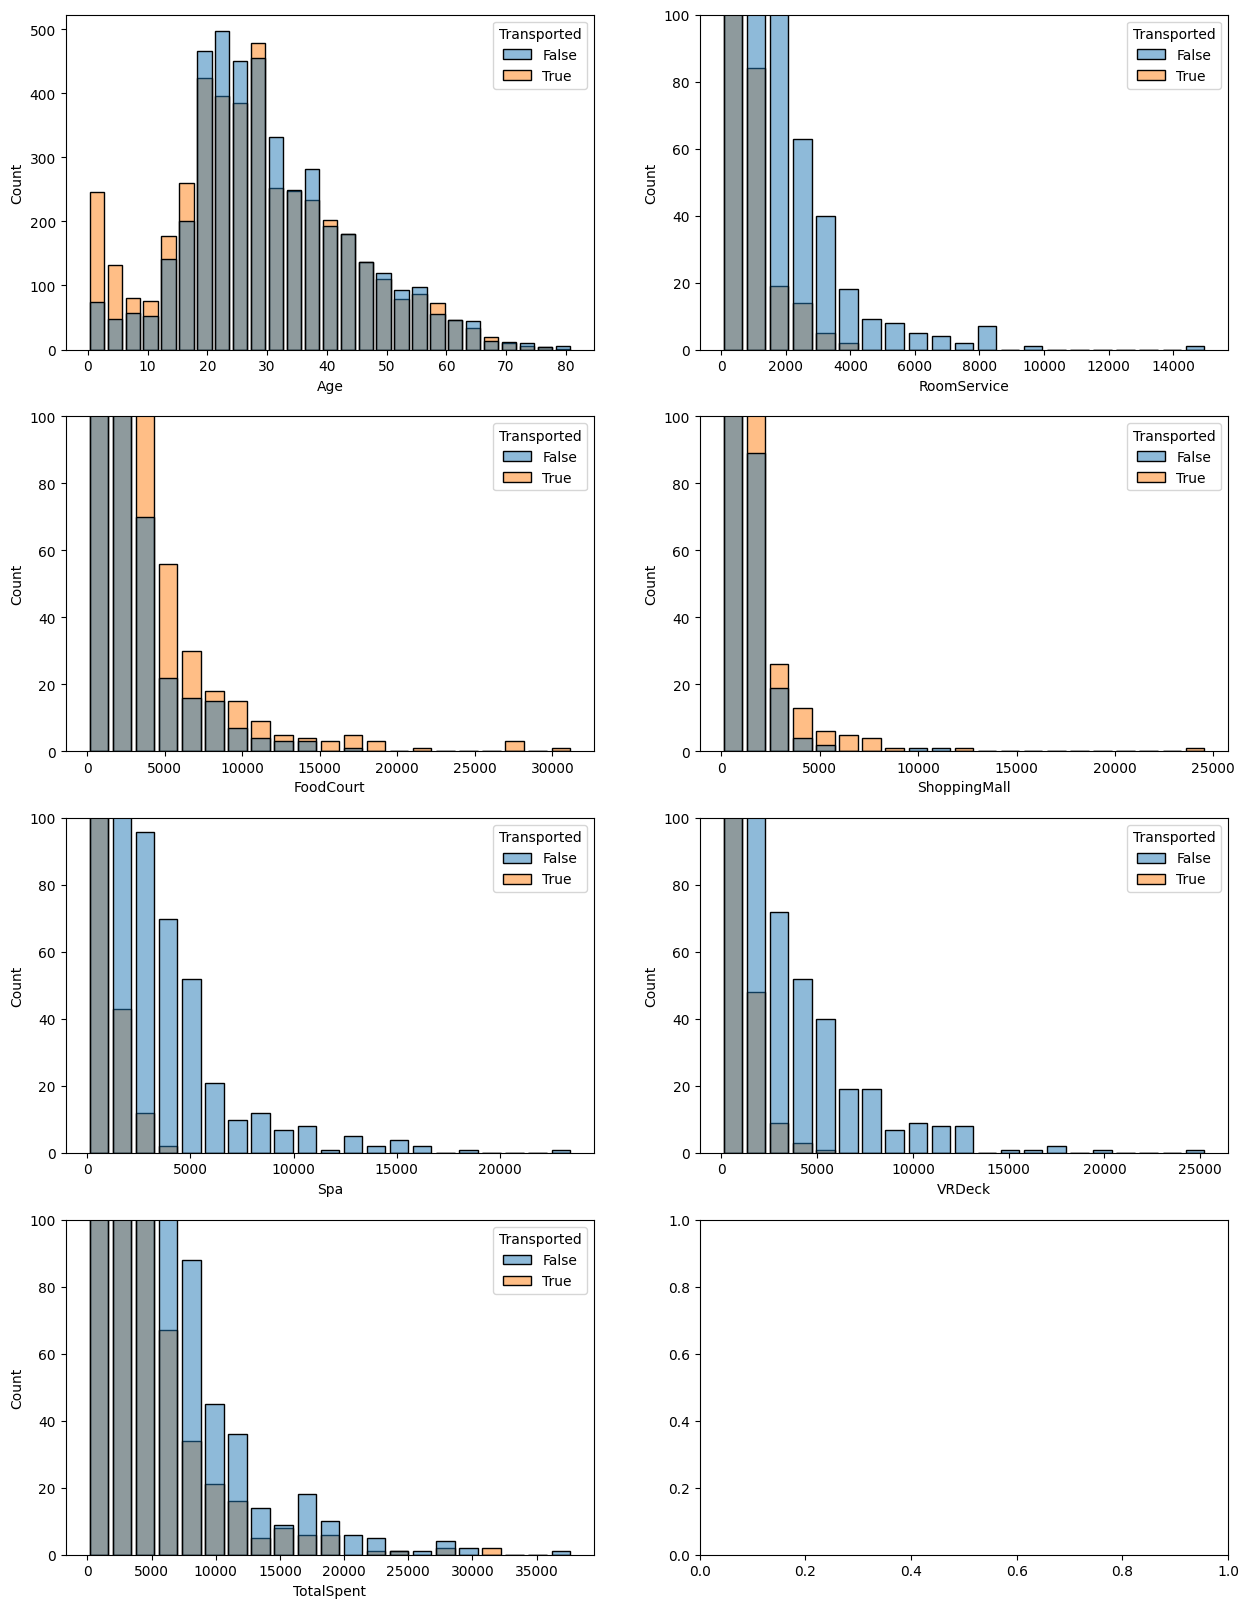

In [10]:
fig, axis = plt.subplots(len(num_cols) // 2 + len(num_cols) % 2, 2)
fig.set_figwidth(15)
fig.set_figheight(20)

for feature, ax in zip(num_cols, axis.flatten()):
    num_compare(data, feature=feature,
                forCol=target,
                binwidth=data[feature].max() // 20,
                ax=ax)
    if feature != 'Age':
        ax.set_ylim(0, data[feature].value_counts().min() * 100)

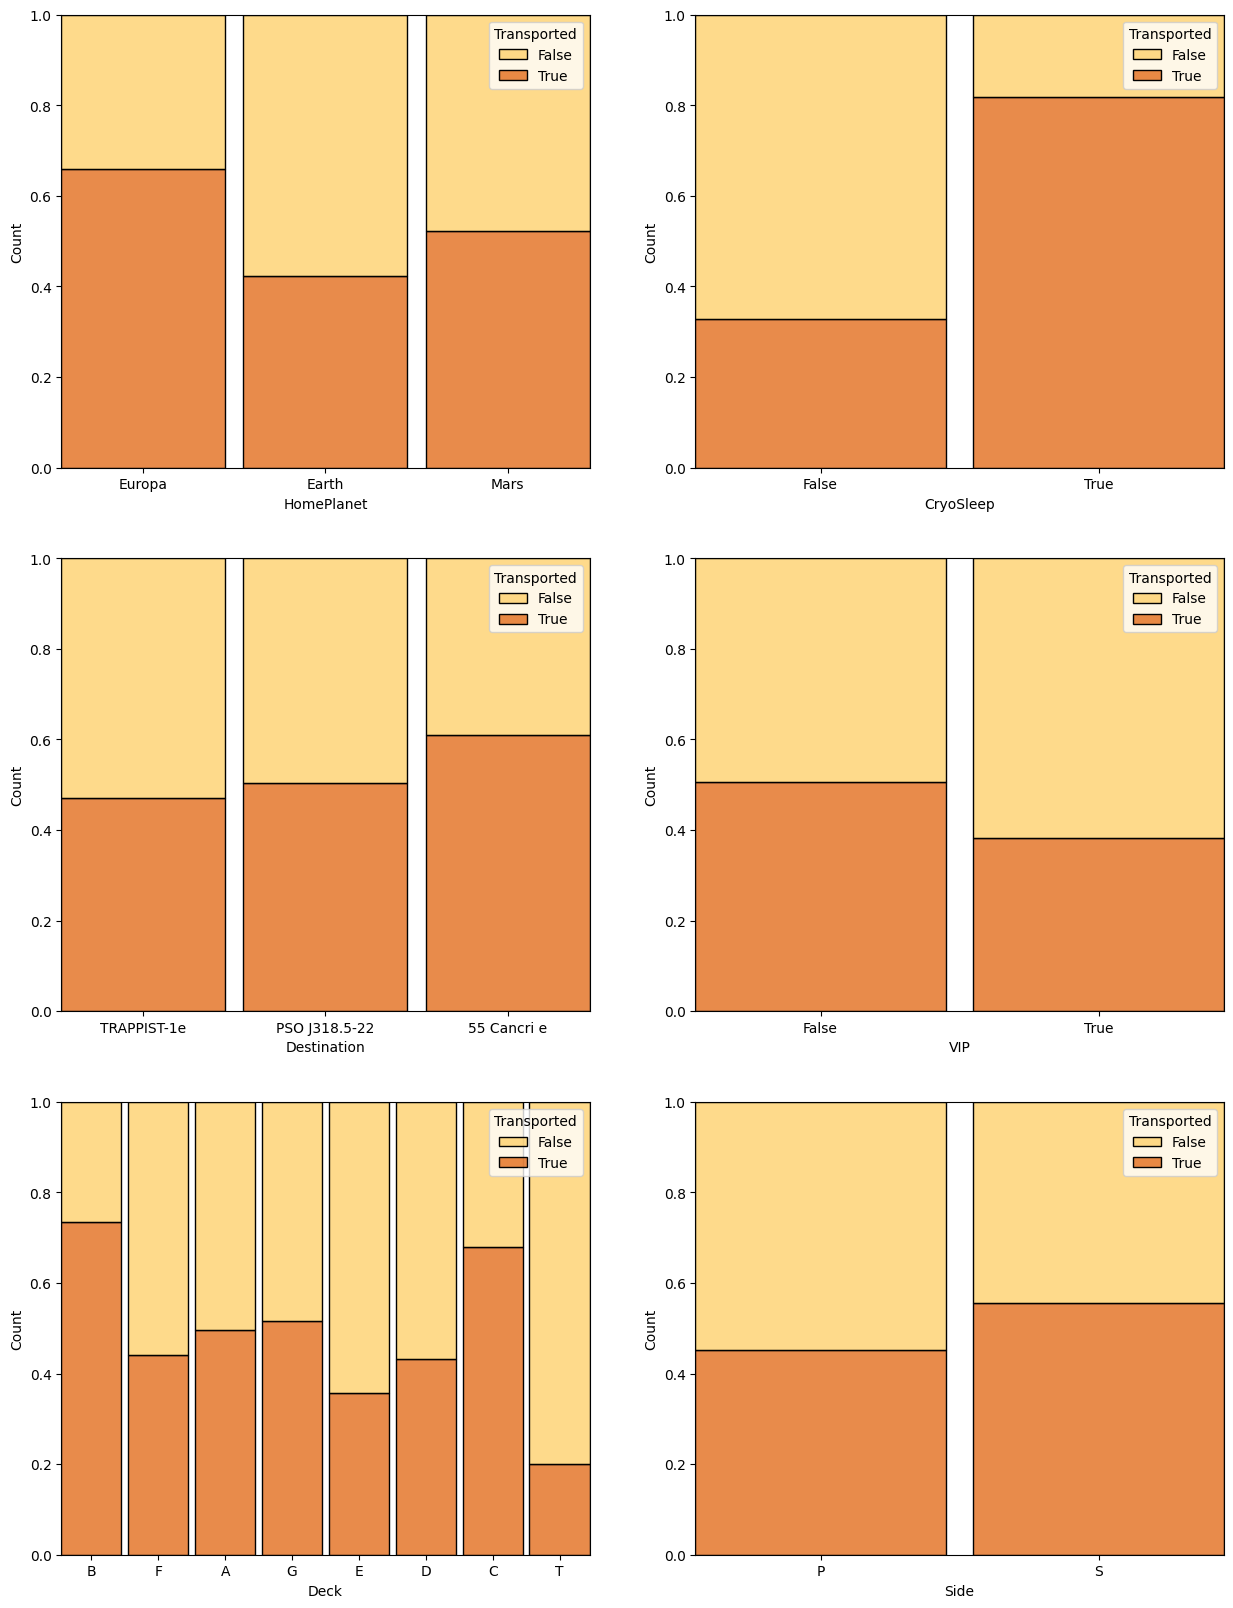

In [11]:
fig, axis = plt.subplots(len(cat_cols) // 2 + len(cat_cols) % 2, 2)
fig.set_figwidth(15)
fig.set_figheight(20)

for feature, ax in zip(cat_cols, axis.flatten()):
    cat_compare(data, feature=feature, forCol=target, ax=ax)

#### Splitting passengers by groups and checking wether having a VIP in group reduces your chances to be transported

In [12]:
data[['Group', 'NinGroup']] = data.PassengerId.str.split('_', expand=True)[[0, 1]]

In [13]:
data['VIPinGroup'] = data.groupby(['Group'])['VIP'].transform(lambda x: True if x.sum() > 0 else False)

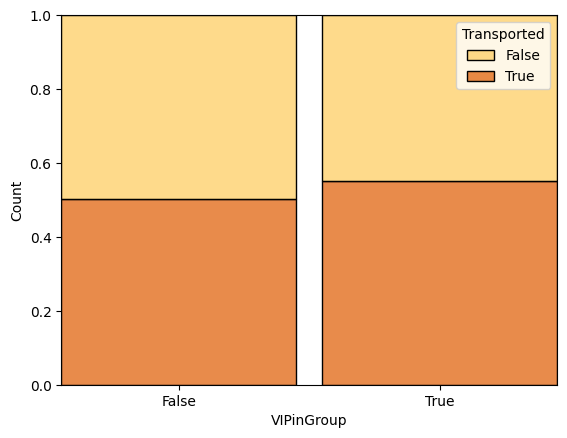

In [14]:
cat_compare(data, feature='VIPinGroup', forCol=target)

<span style="color:darkred"> Conclusion: </span>
    
    -> No strong correlation  

## <span style="color:green"> Comparing features to find out some laws to fill missing </span>

#### Relation between being VIP or having a VIP in group and TotalSpent

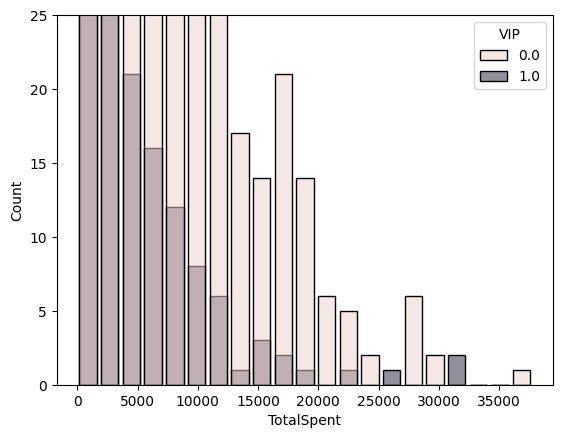

In [15]:
num_compare(data, feature='TotalSpent', forCol='VIP', binwidth=data.TotalSpent.max() // 20, ylim = [0,25])

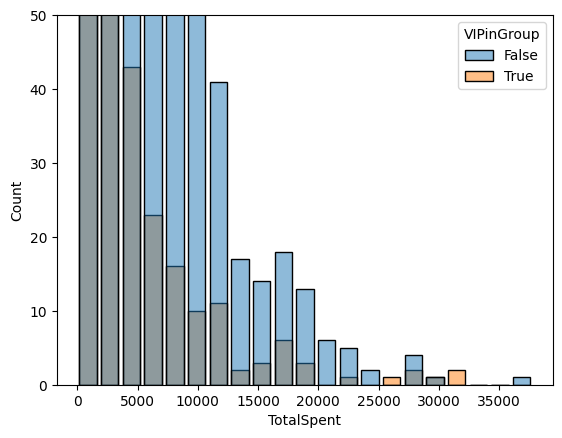

In [16]:
num_compare(data, feature='TotalSpent', forCol='VIPinGroup', binwidth=data.TotalSpent.max() // 20, ylim = [0, 50])

<span style="color:darkred"> Conclusion: </span>
    
    -> No strong correlation  

### <span style="color:blue"> Planets </span>

#### Relation between Deck/Side and HomePlanet

In [17]:
PlanetByDeck = pd.pivot_table(data, index='Deck', columns='HomePlanet', values='PassengerId', aggfunc=len)
PlanetByDeck

HomePlanet,Earth,Europa,Mars
Deck,,,
A,NaN,252.0,NaN
B,NaN,766.0,NaN
C,NaN,734.0,NaN
D,NaN,186.0,282.0
E,395.0,128.0,330.0
F,1614.0,NaN,1110.0
G,2498.0,NaN,NaN
T,NaN,4.0,NaN


In [18]:
PlanetBySide = pd.pivot_table(data, index='Side', columns='HomePlanet', values='PassengerId', aggfunc=len)
PlanetBySide

HomePlanet,Earth,Europa,Mars
Side,,,
P,2270,955,888
S,2237,1115,834


<span style="color:darkred"> Conclusion: </span>
    
    -> People, traveling in A, B, C, D, T decks are from Europa
    
    -> People traveling in G deck are from Earth
    
    -> No strong correlation between HomePlanet and Side

#### Relation between Group/Surname and HomePlanet/Destination

In [19]:
data.dropna(subset=['HomePlanet']).groupby(['Group'])['HomePlanet'].unique().apply(lambda x: True if len(x) == 1 else False).value_counts()

True    6107
Name: HomePlanet, dtype: int64

In [20]:
data.dropna(subset=['Destination']).groupby(['Group'])['Destination'].unique().apply(lambda x: True if len(x) == 1 else False).value_counts()

True     5397
False     717
Name: Destination, dtype: int64

In [21]:
data['Surname'] = data.Name.str.split(' ',expand=True)[1]

In [22]:
data.dropna(subset=['HomePlanet']).groupby(['Surname'])['HomePlanet'].unique().apply(lambda x: True if len(x) == 1 else False).value_counts()

True    2209
Name: HomePlanet, dtype: int64

In [23]:
data.dropna(subset=['Destination']).groupby(['Surname'])['Destination'].unique().apply(lambda x: True if len(x) == 1 else False).value_counts()

False    1215
True      994
Name: Destination, dtype: int64

<span style="color:darkred"> Conclusion: </span>
    
    -> Groupmates are from same planets but do not have same destinations
    
    -> Families are from same planets but do not have same destinations

### <span style="color:blue"> CryoSleep </span>

#### Relation between CryoSleep and TotalSpent

In [24]:
data[(data.CryoSleep == True) & (data.TotalSpent > 0)].shape

(0, 22)

<span style="color:darkred"> Conclusion: </span>
    
    -> Sleeping people do not spend money :)
    

#### Relation between CryoSleep and Age/VIP

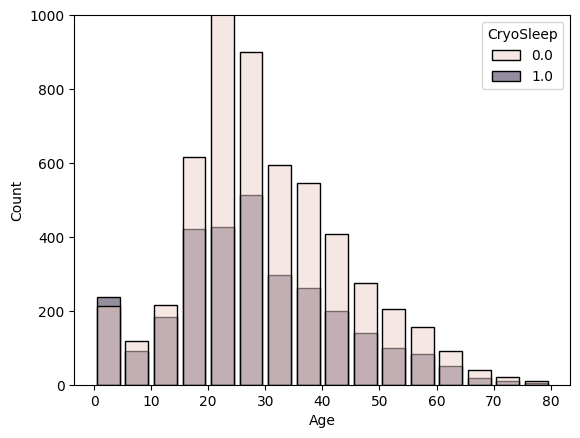

In [25]:
num_compare(data, feature='Age', forCol='CryoSleep', binwidth=5, ylim=[0, 1000])

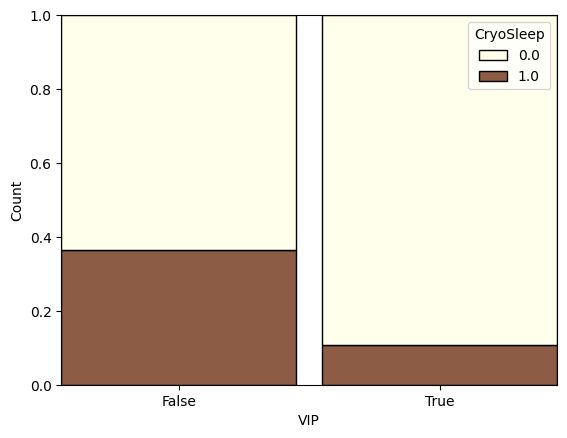

In [26]:
cat_compare(data, feature='VIP', forCol='CryoSleep')

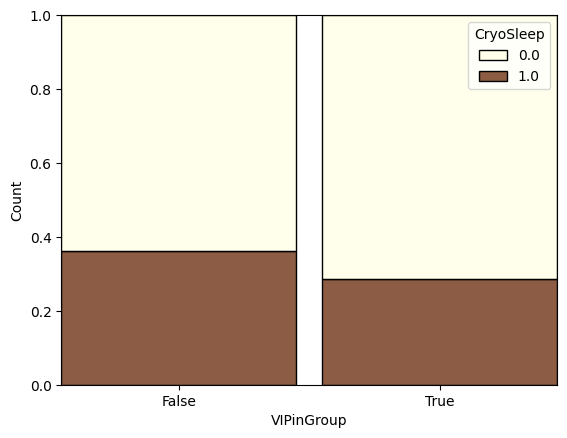

In [27]:
cat_compare(data, feature='VIPinGroup', forCol='CryoSleep')

<span style="color:darkred"> Conclusion: </span>
    
    -> Slight correlation with Age: people under 15 y.o. and above 70 y.o. have more chances to have a Cryo nap :)
    
    -> VIP's don't like sleeping

#### Relation between CryoSleep and HomePlanet/Destination/Route

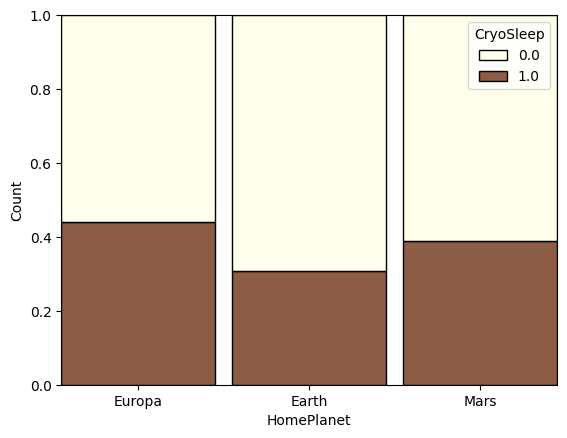

In [28]:
cat_compare(data, feature='HomePlanet', forCol='CryoSleep')

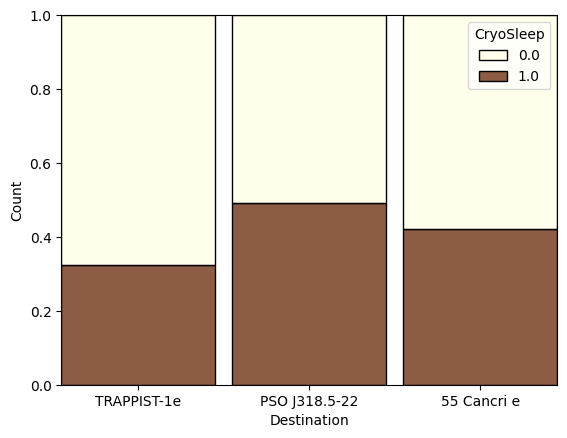

In [29]:
cat_compare(data, feature='Destination', forCol='CryoSleep')

In [30]:
data['Route'] = data.HomePlanet.dropna().str.slice(start=0, stop=2).astype('string') + '-' + data.Destination.dropna().str.slice(start=0, stop=2).astype('string')

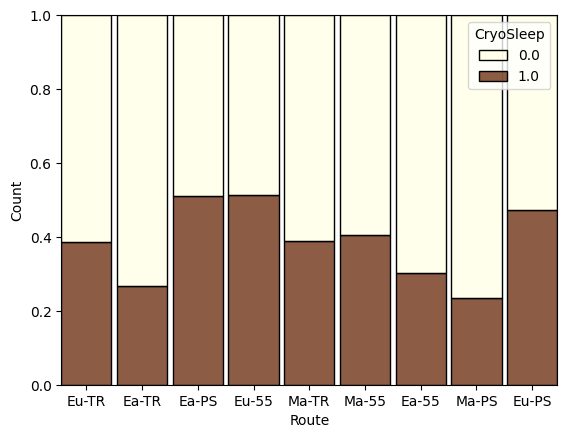

In [31]:
cat_compare(data, feature='Route', forCol='CryoSleep', ylim=[0, 1])

<span style="color:darkred"> Conclusion: </span>
    
    -> Seems like people flying 'Ma-PS', 'Ea-TR' and 'Ea-55' are less likely to have a Cryo nap

#### Relation between CryoSleep and Deck/Side

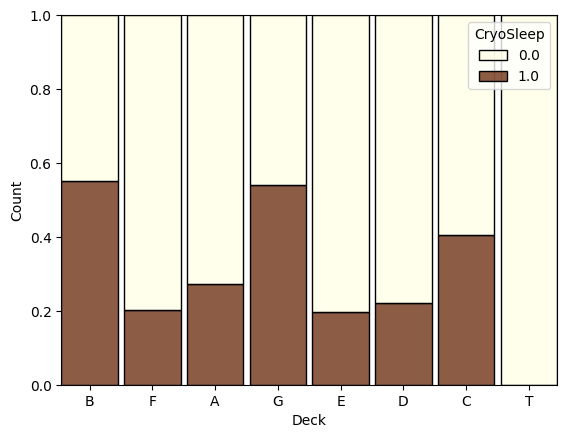

In [32]:
cat_compare(data, feature='Deck', forCol='CryoSleep')

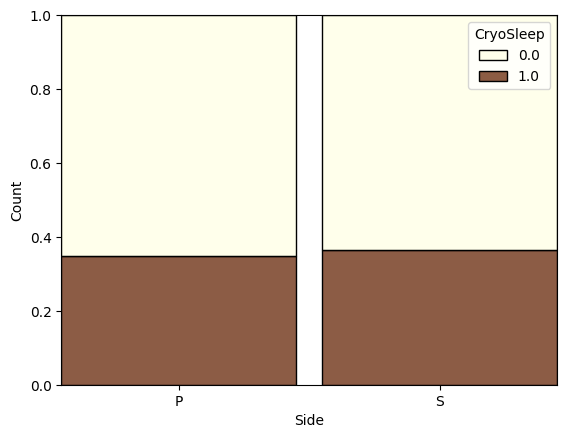

In [33]:
cat_compare(data, feature='Side', forCol='CryoSleep')

<span style="color:darkred"> Conclusion: </span>
    
    -> No CryoSleepers in T Deck
    
    -> No strong correlation between Cryo and Side

### <span style="color:blue"> VIP </span>

#### Relation between VIP and Deck/Side

In [34]:
VIP_by_Deck = pd.pivot_table(data, index='Deck', columns='VIP', values='PassengerId', aggfunc=len)
VIP_by_Deck

VIP,False,True
Deck,,
A,215.0,35.0
B,725.0,42.0
C,687.0,41.0
D,438.0,31.0
E,846.0,15.0
F,2695.0,29.0
G,2493.0,NaN
T,5.0,NaN


In [35]:
VIP_by_Side = pd.pivot_table(data, index='Side', columns='VIP', values='PassengerId', aggfunc=len)
VIP_by_Side

VIP,False,True
Side,,
P,4011,102
S,4093,91


<span style="color:darkred"> Conclusion: </span>
    
    -> No VIP's in G and T Decks
    
    -> No strong correlation between VIP and Side

#### Relation between VIP and Age

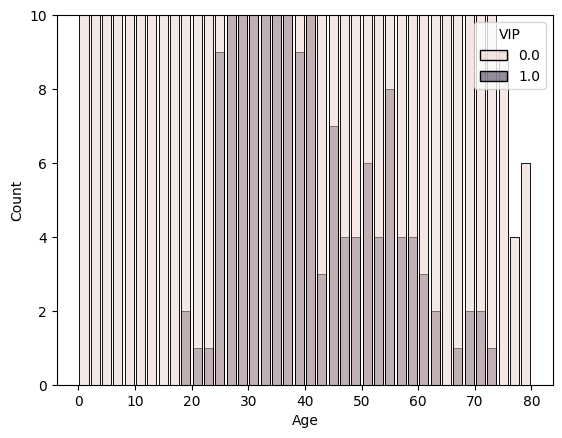

In [36]:
num_compare(data, feature='Age', forCol='VIP', binwidth=2, ylim=[0, 10])

<span style="color:darkred"> Conclusion: </span>
    
    -> No VIP's under 18 y.o.
    
    -> No VIP's above 74 y.o.

#### Relation between VIP and HomePlanet

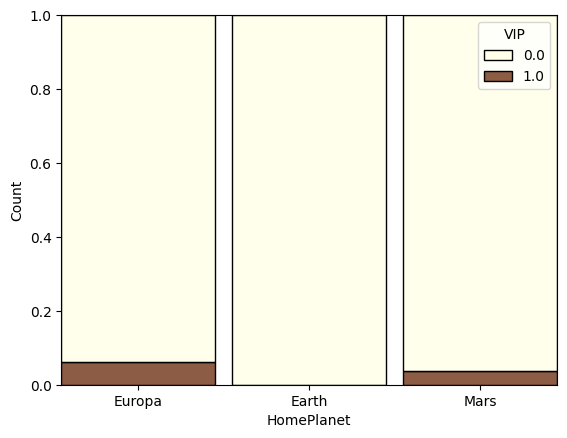

In [37]:
cat_compare(data, feature='HomePlanet', forCol='VIP')

<span style="color:darkred"> Conclusion: </span>
    
    -> No VIP's from Earth

#### Relation between VIP and Destination

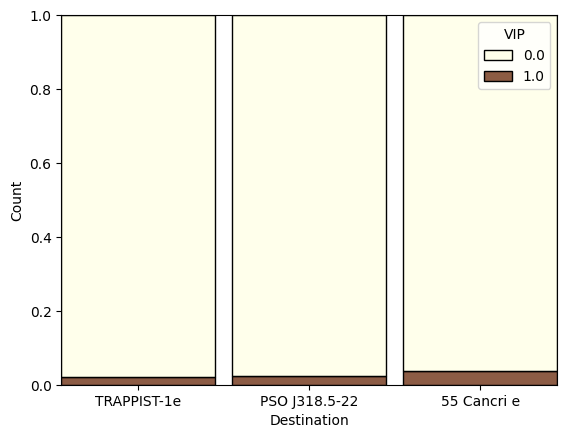

In [38]:
cat_compare(data, feature='Destination', forCol='VIP')

<span style="color:darkred"> Conclusion: </span>
    
    -> No strong correlation

### <span style="color:blue"> Spendings </span>

In [67]:
planets = ['Europa', 'Earth', 'Mars']
aggegation = {'RoomService': 'mean',
              'FoodCourt': 'mean',
              'ShoppingMall': 'mean',
              'Spa': 'mean',
              'VRDeck': 'mean',
              'TotalSpent': 'mean'}

m_spent = pd.DataFrame()

for planet in planets:
    m_spent[planet] = data.loc[(data.HomePlanet == planet)].agg(aggegation)

In [68]:
 m_spent

,Europa,Earth,Mars
RoomService,145.231981,136.940209,552.897272
FoodCourt,1503.212950,137.228857,54.361999
ShoppingMall,151.132820,133.872606,308.445734
Spa,848.055609,142.781701,110.221706
VRDeck,875.765998,138.132933,47.440698
TotalSpent,3552.749740,688.443307,1074.122229


<span style="color:darkred"> Conclusion: </span>
    
    -> Got mean values of spendings for each planet

## Filling in some missing values

#### <span style="color:darkorange"> HomePlanet strategy </span>

1) values based on Deck

2) values based on group

3) values based on surname

<span style="color:green"> DONE </span>

In [161]:
def HomePlanetFill(data):
    planet_by_deck = {
        'A': 'Europa',
        'B': 'Europa',
        'C': 'Europa',
        'D': 'Europa',
        'T': 'Europa',
        'G': 'Earth'
    }
    
    for deck, planet in planet_by_deck.items():
        data.loc[(data.Deck == deck) & (data.HomePlanet.isna()), 'HomePlanet'] = data.loc[(data.Deck == deck) & (data.HomePlanet.isna()), 'HomePlanet'].fillna(value=planet)
        
    
    planet_by_group = data.dropna(subset=['HomePlanet']).groupby(['Group'])['HomePlanet'].agg(pd.Series.mode).to_dict()
    
    for row in data.loc[(data.HomePlanet.isnull())].index:
        data.loc[row, 'HomePlanet'] = planet_by_group.get(data.loc[row, 'Group'])
        
    planet_by_surname = data.dropna(subset=['HomePlanet']).groupby(['Surname'])['HomePlanet'].agg(pd.Series.mode).to_dict()
    
    for row in data.loc[(data.HomePlanet.isnull())].index:
        data.loc[row, 'HomePlanet'] = planet_by_surname.get(data.loc[row, 'Surname'], 'Earth')
        
    return data

#### <span style="color:darkorange"> CryoSleep strategy </span>

1) values based on TotalSpent

2) values based on Age

3) values based on spending (assuming people do not spend money on a single facility

<span style="color:green"> DONE </span>

In [156]:
def CryoSleepFill(data):
    
    # TotalSpent == 0 => Cryo == True
    data.loc[((data.CryoSleep.isna()) & (data.TotalSpent == 0)), 'CryoSleep'] = data.loc[((data.CryoSleep.isna()) & (data.TotalSpent == 0)), 'CryoSleep'].fillna(value=True)
    
    # Age <= 15 or >= 70 => Cryo == True
    data.loc[((data.CryoSleep.isna()) & ((data.Age <= 15.0) | (data.Age >= 70.0))), 'CryoSleep'] = data.loc[((data.CryoSleep.isna()) & ((data.Age <= 15.0) | (data.Age >= 70.0))), 'CryoSleep'].fillna(value=True)
    
    # All nonNone spendings == 0 => CryoSleep == True
    data.loc[((data.CryoSleep.isna()) & 
              ((data.RoomService == 0) | (data.RoomService.isna())) &
              ((data.FoodCourt == 0) | (data.FoodCourt.isna())) &
              ((data.ShoppingMall == 0) | (data.ShoppingMall.isna())) &
              ((data.Spa == 0) | (data.Spa.isna())) &
              ((data.VRDeck == 0) | (data.VRDeck.isna()))
             ), 'CryoSleep'] = (
    data.loc[((data.CryoSleep.isna()) & 
              ((data.RoomService == 0) | (data.RoomService.isna())) &
              ((data.FoodCourt == 0) | (data.FoodCourt.isna())) &
              ((data.ShoppingMall == 0) | (data.ShoppingMall.isna())) &
              ((data.Spa == 0) | (data.Spa.isna())) &
              ((data.VRDeck == 0) | (data.VRDeck.isna()))
             ), 'CryoSleep'].fillna(value=True)
    )
    
    # Rest
    data.loc[(data.CryoSleep.isna()), 'CryoSleep'] = data.loc[(data.CryoSleep.isna()), 'CryoSleep'].fillna(value=False)
    
    return data

#### <span style="color:darkorange"> Spending strategy </span>

1) 0 if CryoSleep == True

<span style="color:red"> IN PROGRESS </span>

In [175]:
def SpendingFill(data):
    spending_features = ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'TotalSpent']
    
    for f in spending_features:
        data.loc[((data.CryoSleep == True) & data[f].isna()), f] = data.loc[((data.CryoSleep == True) & data[f].isna()), f].fillna(value=0.0)
    
    return data

In [176]:
data = SpendingFill(data)

In [178]:
data[data.TotalSpent.isna()].sample(50)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,...,Transported,Deck,CabNum,Side,TotalSpent,Group,NinGroup,VIPinGroup,Route,Surname
4408,4680_01,Mars,False,D/155/P,TRAPPIST-1e,17.0,False,NaN,0.0,38.0,...,False,D,155,P,NaN,4680,01,False,Ma-TR,Colte
2863,3092_01,Earth,False,G/506/P,TRAPPIST-1e,22.0,False,NaN,0.0,102.0,...,False,G,506,P,NaN,3092,01,False,Ea-TR,Solivers
587,0610_01,Earth,False,F/129/P,TRAPPIST-1e,24.0,False,0.0,NaN,229.0,...,False,F,129,P,NaN,0610,01,False,Ea-TR,Potters
8396,8975_02,Earth,False,F/1840/P,TRAPPIST-1e,27.0,False,1.0,NaN,0.0,...,False,F,1840,P,NaN,8975,02,False,Ea-TR,Goffey
6446,6808_01,Earth,False,F/1416/P,TRAPPIST-1e,27.0,False,0.0,NaN,192.0,...,False,F,1416,P,NaN,6808,01,False,Ea-TR,Santantines
6386,6748_04,Mars,False,D/205/S,TRAPPIST-1e,34.0,False,470.0,0.0,NaN,...,False,D,205,S,NaN,6748,04,False,Ma-TR,Scake
2457,2636_01,Earth,False,G/419/S,TRAPPIST-1e,22.0,False,NaN,0.0,137.0,...,False,G,419,S,NaN,2636,01,False,Ea-TR,Owerson
8623,9197_04,Europa,False,C/308/P,55 Cancri e,30.0,False,1569.0,NaN,0.0,...,False,C,308,P,NaN,9197,04,True,Eu-55,Platch
1847,1976_01,Europa,False,B/82/S,55 Cancri e,23.0,False,0.0,8037.0,NaN,...,True,B,82,S,NaN,1976,01,True,Eu-55,Craleve
2296,2470_02,Earth,False,G/398/S,TRAPPIST-1e,26.0,False,0.0,NaN,0.0,...,False,G,398,S,NaN,2470,02,False,Ea-TR,Bookst


In [177]:
missing = data.isnull()
for col in ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'TotalSpent']:
    print(f'{col}:\n\t{8693 - missing[col].value_counts()[0]} missing values')
    print('-----------------')

RoomService:
	113 missing values
-----------------
FoodCourt:
	112 missing values
-----------------
ShoppingMall:
	109 missing values
-----------------
Spa:
	115 missing values
-----------------
VRDeck:
	121 missing values
-----------------
TotalSpent:
	549 missing values
-----------------
